In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [2]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
#df = yf.download(symbol,start,end)
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-26 00:00:00-05:00,4888.910156,4906.689941,4881.470215,4890.970215,3353400000,0.0,0.0
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,0.0,0.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,0.0,0.0
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,0.0,0.0
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,0.0,0.0


In [3]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [4]:
dfo.options  #to get the date of different expiration time

('2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-08',
 '2024-03-11',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [5]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [6]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240205C01200000,2024-01-19 15:36:15+00:00,1200.0,3594.75,3734.5,3742.6,0.0,0.0,2.0,1,4.565434,True,REGULAR,USD
1,SPXW240205C04050000,2024-01-02 20:36:11+00:00,4050.0,697.54,867.1,907.4,0.0,0.0,1.0,1,1.295475,True,REGULAR,USD
2,SPXW240205C04100000,2024-01-02 20:36:11+00:00,4100.0,648.25,829.6,845.3,0.0,0.0,1.0,1,1.003148,True,REGULAR,USD
3,SPXW240205C04250000,2024-01-22 20:55:56+00:00,4250.0,611.31,685.8,692.7,0.0,0.0,2.0,2,0.630497,True,REGULAR,USD
4,SPXW240205C04300000,2024-01-30 15:00:30+00:00,4300.0,627.23,635.4,641.8,0.0,0.0,1.0,11,0.532720,True,REGULAR,USD


In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-02 00:00:00-05:00,4566.390137,4595.310059,4544.319824,4589.379883,4481580000,0.0,0.0
2022-02-03 00:00:00-05:00,4535.410156,4542.879883,4470.390137,4477.439941,4401970000,0.0,0.0
2022-02-04 00:00:00-05:00,4482.790039,4539.660156,4451.500000,4500.529785,4706290000,0.0,0.0
2022-02-07 00:00:00-05:00,4505.750000,4521.859863,4471.470215,4483.870117,4228480000,0.0,0.0
2022-02-08 00:00:00-05:00,4480.020020,4531.319824,4465.399902,4521.540039,4459620000,0.0,0.0


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [8]:
def annual_vol(df):

    log_return = np.log(df['Close'] / df['Close'].shift(1))
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol * np.sqrt(252)

    return vol

In [9]:
vol = annual_vol(df)
vol

0.1925283486159109

# **BLACK-SCHOLES MODEL**


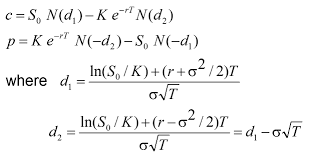

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [10]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option == 'call':
    premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
  elif option == 'put':
    premium = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
  else:
    raise ValueError("Invalid option type. Use 'call' or 'put'.")

  return premium

In [11]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [12]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,3706.190012
4050.0,856.190181
4100.0,806.190184
4250.0,656.190198
4300.0,606.190244


In [13]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1200.0,3594.75
4050.0,697.54
4100.0,648.25
4250.0,611.31
4300.0,627.23


In [14]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3706.190012,3594.75
4050.0,856.190181,697.54
4100.0,806.190184,648.25
4250.0,656.190198,611.31
4300.0,606.190244,627.23
4350.0,556.190543,575.73
4370.0,536.190920,516.67
4375.0,531.191062,547.23
4380.0,526.191231,552.47
4400.0,506.192268,526.37


<Axes: >

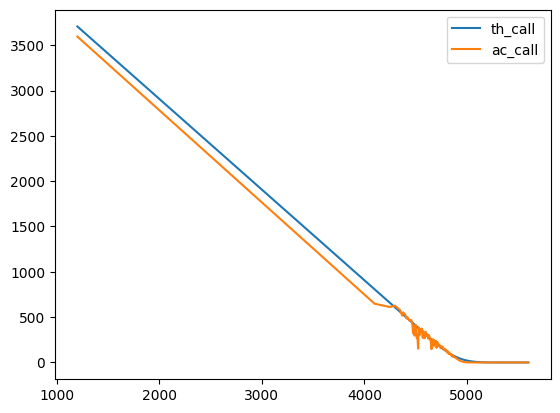

In [15]:
call.plot() #plotting the actual and theoretical call prices

In [16]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
1800.0,5.047968e-271
2000.0,2.135536e-217
2200.0,5.478792e-174
2400.0,1.375902e-138
2600.0,1.382315e-109


In [17]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
1800.0,0.07
2000.0,0.05
2200.0,0.05
2400.0,0.05
2600.0,0.05


In [18]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4980.0,100.651982,46.20
4990.0,107.819473,64.80
5000.0,115.219992,61.02
5010.0,122.842803,107.02
5020.0,130.676643,102.01
5025.0,134.669071,100.78
5030.0,138.709865,93.04
5050.0,155.326727,147.20
5125.0,222.712607,221.19
5150.0,246.419897,261.64


<Axes: >

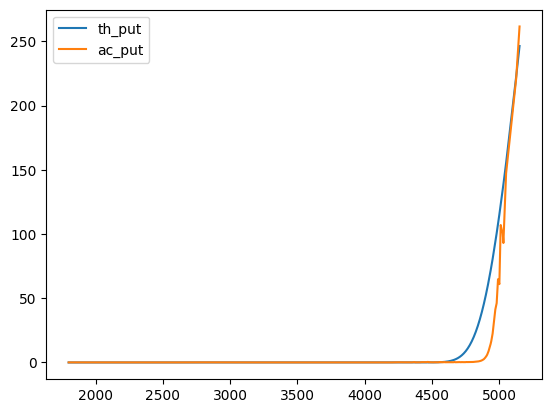

In [19]:
put.plot()